In [94]:
% matplotlib inline
import numpy as np
from helpers import load_data
import scipy.sparse as sp


In [118]:
from blending import get_all_indices, read_numpy_files
from our_helpers import load_data
files_full_submission = [ \
        '../submission/train_surprise_unrounded_0.99256.csv']
files_full_numpy = [\
        '../submission/saved_0.98475.npy',\
        '../submission/saved_0.984.npy', \
        '../src/blend_0.06255_8.npy']
errors_submission = [0.99256, 0.98475, 0.98431]
file_train_true = '../data/data_train.csv'
file_submission_true = '../data/sampleSubmission.csv'

# Read full matrices 
train_true = load_data(file_train_true)
training_true = apply_indices([train_true], 'train')[0]
test_true = apply_indices([train_true], 'test')[0]
validation_true = apply_indices([train_true], 'validation')[0]



number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000
number of rows, cols: 1117939 1117939
number of non-zero elements in matrix 0: 1117939
number of items: 10000, number of users: 1000
number of rows, cols: 29403 29403
number of non-zero elements in matrix 0: 29403
number of items: 10000, number of users: 1000
number of rows, cols: 29610 29610
number of non-zero elements in matrix 0: 29610


NameError: name 'laod_data' is not defined

In [ ]:
submission_true = load_data(file_submission_true)
indices = get_all_indices(train_true, submission_true)
trains_full = read_numpy_files(files_full_numpy, indices)

In [97]:
# Apply indices.
from blending import apply_indices
train_est = apply_indices(trains_full, 'train') 
test_est = apply_indices(trains_full, 'test') 
submission_est = apply_indices(trains_full, 'submission') 
validation_est = apply_indices(trains_full, 'validation') 

number of items: 10000, number of users: 1000
number of rows, cols: 1117939 1117939
number of non-zero elements in matrix 0: 1117939
number of non-zero elements in matrix 1: 1117939
number of items: 10000, number of users: 1000
number of rows, cols: 29403 29403
number of non-zero elements in matrix 0: 29403
number of non-zero elements in matrix 1: 29403
number of items: 10000, number of users: 1000
number of rows, cols: 1176952 1176952
number of non-zero elements in matrix 0: 1176952
number of non-zero elements in matrix 1: 1176952
number of items: 10000, number of users: 1000
number of rows, cols: 29610 29610
number of non-zero elements in matrix 0: 29610
number of non-zero elements in matrix 1: 29610


In [98]:
# Add matrices saved in submission format.
from blending import read_submission_files
surprise_full = read_submission_files(files_full_submission)
surprise_train_est = apply_indices(surprise_full, 'train') 
surprise_test_est = apply_indices(surprise_full, 'test') 
surprise_validation_est = apply_indices(surprise_full, 'validation') 
files_submission = [ \
        '../submission/submission_surprise_unrounded_0.99256.csv']
surprise_submission = read_submission_files(files_submission)

for i in range(len(surprise_train_est)):
    validation_est.append(surprise_validation_est[i])
    train_est.append(surprise_train_est[i])
    test_est.append(surprise_test_est[i])
    submission_est.append(surprise_submission[i])

number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000
number of rows, cols: 1117939 1117939
number of non-zero elements in matrix 0: 1117939
number of items: 10000, number of users: 1000
number of rows, cols: 29403 29403
number of non-zero elements in matrix 0: 29403
number of items: 10000, number of users: 1000
number of rows, cols: 29610 29610
number of non-zero elements in matrix 0: 29610
number of items: 10000, number of users: 1000


In [100]:
print('{}\n{}'.format(train_est, len(train_est)))
print('{}\n{}'.format(test_est, len(train_est)))
print('{}\n{}'.format(submission_est, len(train_est)))

[<10000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1117939 stored elements in LInked List format>, <10000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1117939 stored elements in LInked List format>, <10000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1117939 stored elements in LInked List format>]
3
[<10000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 29403 stored elements in LInked List format>, <10000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 29403 stored elements in LInked List format>, <10000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 29403 stored elements in LInked List format>]
3
[<10000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1176952 stored elements in LInked List format>, <10000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1176952 stored elements in LInked List format>, <10000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1176952 stored elemen

user min, max, mean: 8 4373 1117.64564565
user min, max, mean: 8 4373 1117.64564565
user min, max, mean: 8 4373 1117.64564565
user min, max, mean: 8 4373 1117.64564565


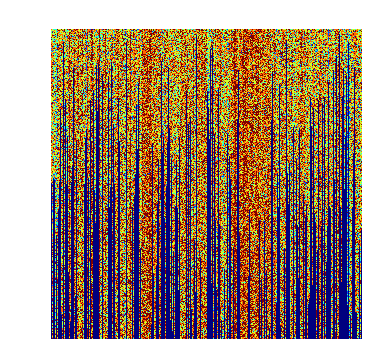

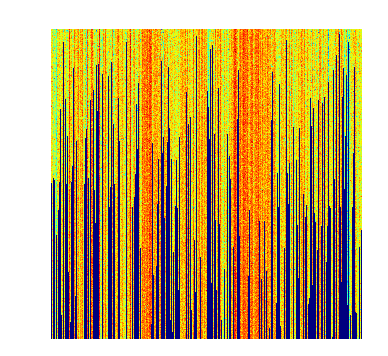

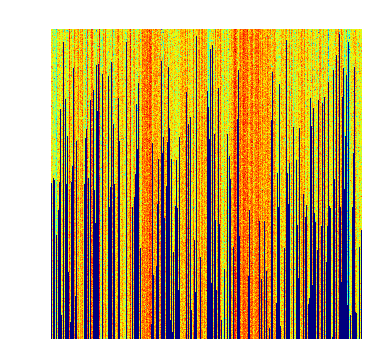

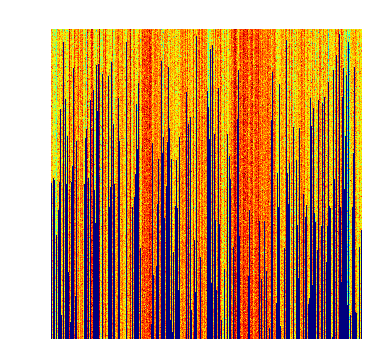

In [107]:
from data_postprocess import create_sparse_matrix_plot
# Visualize matrices
i_total, ratings_dense = create_sparse_matrix_plot(training_true, '../results/Blending/matrix_train.png')

dense_matrices=[]
dense_matrices.append(ratings_dense.copy())
#j_total, _ = create_matrix_plot(train_true, axis=1)
for i,matrix_est in enumerate(train_est):
    __, ratings_dense = create_sparse_matrix_plot(matrix_est, '../results/Blending/matrix_{}'.format(i+1))
    dense_matrices.append(ratings_dense.copy())

3.98181395843
3.98034369376


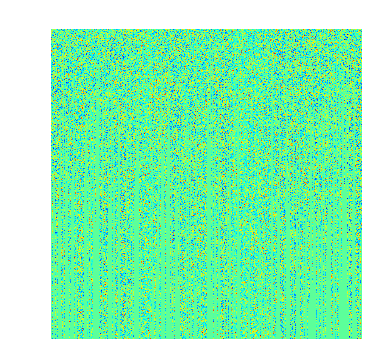

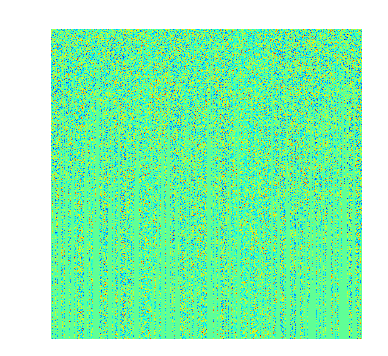

In [109]:
diff_matrix = dense_matrices[1]-dense_matrices[0]
print(np.max(diff_matrix))
matrix_plot(diff_matrix, '../results/matrix_diff1.png', 1000)
diff_matrix = dense_matrices[2]-dense_matrices[0]
print(np.max(diff_matrix))
matrix_plot(diff_matrix, '../results/matrix_diff2.png', 1000)

In [111]:
from blending import linear_blending
q_hat, x = linear_blending(test_est, submission_est, test_true)
print(q_hat)
print(len(q_hat))

x [ 25.22867982 -22.75273329  -1.47583697]
[ 2.94919525  3.63128109  4.10237371 ...,  2.69364682  3.49944773
  4.12047037]
1176952


user min, max, mean: 1 121 29.891809909
rmse method 0: 0.9148671270316884
user min, max, mean: 1 121 29.891809909
[ 1.19396891 -0.97906073 -0.94421392 ...,  0.86627406  2.34448381
  0.76806618]
rmse method 1: 0.9188515615319623
user min, max, mean: 1 121 29.891809909
[ 1.2076071  -0.98099105 -0.95176833 ...,  0.87308738  2.35154163
  0.77244178]
rmse method 2: 0.9795680607309687
user min, max, mean: 1 121 29.891809909
[ 1.05104997 -0.97146344 -0.98306096 ...,  0.75601515  2.34505727
  0.81704509]
rmse method 2: 0.8292561491708921


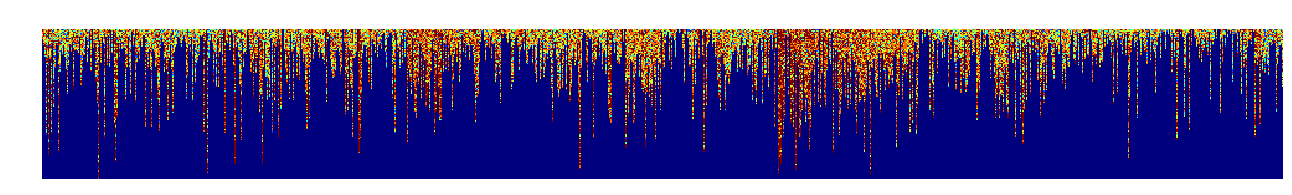

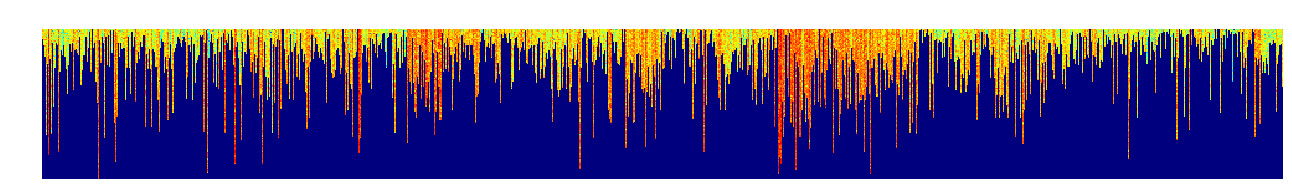

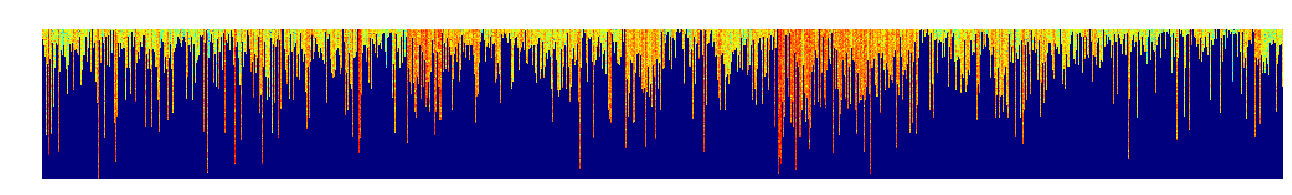

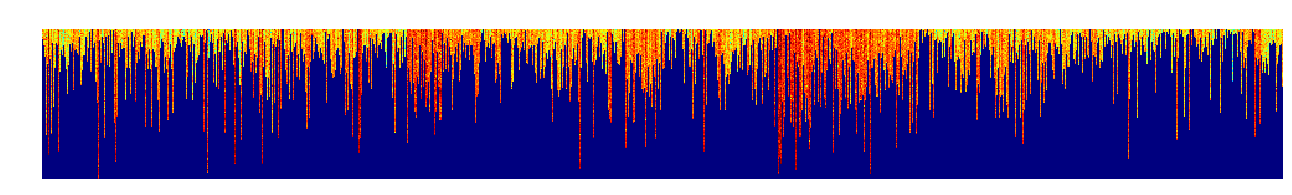

In [117]:
__,__,true_values = sp.find(validation_true)
i_total, validation_dense = create_sparse_matrix_plot(validation_true, '../results/Blending/matrix_validation.png')

Q = np.empty((len(true_values),len(validation_est)))
for i,validation_prediction in enumerate(validation_est):
    __,__,predictions = sp.find(validation_prediction)
    Q[:,i] = predictions
    rmse = np.sqrt(np.sum(np.power(predictions-true_values, 2)) / len(true_values))
    print('rmse method {}: {}'.format(i,rmse))
    create_sparse_matrix_plot(validation_prediction, '../results/Blending/matrix_validation_{}.png'.format(i))
    print(predictions - true_values)
blending_prediction = np.dot(Q, x) 
rmse = np.sqrt(np.sum(np.power(blending_prediction-true_values, 2)) / len(true_values))
print('rmse method {}: {}'.format(i,rmse))